# Principal Components Analysis

<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 5<br>
<font color=696880 size=4>
    Amirhossein Alamdar

____

In [3]:
student_number = 402208592
full_name = "Mohammad Mohammadi"
assert student_number and full_name is not None, 'pls input your information'

# Introduction 

In this assignment, you will implement PCA and try to interpret it.

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Preparation (30)

Read the nutrition CSV file and display a few samples.

In [7]:
df = pd.read_csv('nutrition.csv')
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


Display dataset information.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


Exclude the non-numeric features (you will need these features later in the notebook).

In [15]:
non_numeric_features = df.select_dtypes(include=['object', 'int64']).columns
numeric_df = df.select_dtypes(include=['float64'])
numeric_df.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [18]:
non_numeric_df = df[non_numeric_features]
# non_numeric_df.head()

First of all, plot the correlation matrix and identify redundant features. Note to use numerical features for this.

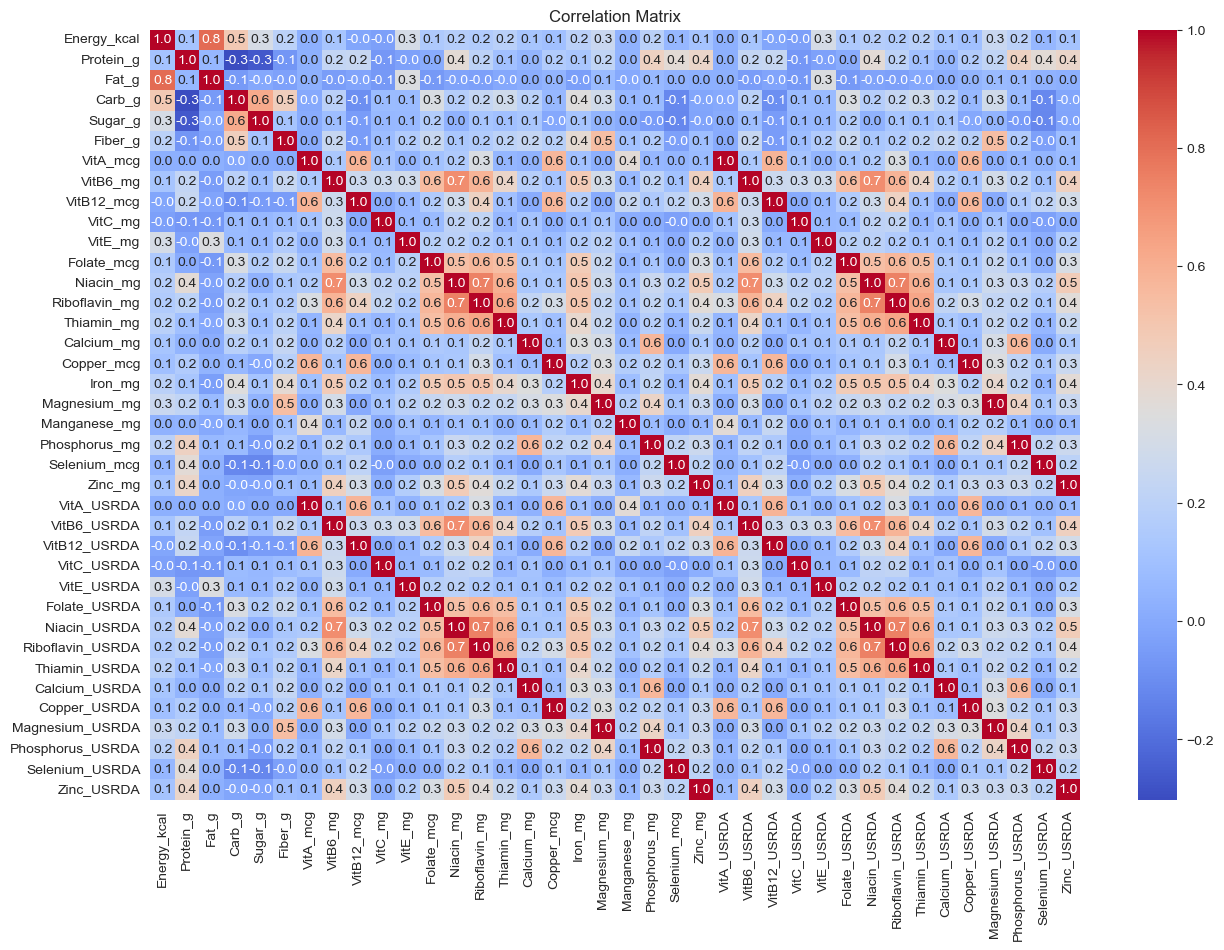

In [25]:
corr_matrix = numeric_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [26]:
redundant_features = set()
threshold = 0.9
for i in range(corr_matrix.shape[0]):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            redundant_features.add(corr_matrix.columns[i])

print("Redundant features identified (correlation > 0.9):", redundant_features)

Redundant features identified (correlation > 0.9): {'VitB6_USRDA', 'Selenium_USRDA', 'Calcium_USRDA', 'Folate_USRDA', 'Thiamin_USRDA', 'Zinc_USRDA', 'Copper_USRDA', 'VitA_USRDA', 'VitB12_USRDA', 'Phosphorus_USRDA', 'Niacin_USRDA', 'VitE_USRDA', 'Riboflavin_USRDA', 'Magnesium_USRDA', 'VitC_USRDA'}


Identify redundant features and remove them from the dataframe. Plot the correlation matrix again.

Redundant features identified (correlation > 0.9): {'VitB6_USRDA', 'Selenium_USRDA', 'Calcium_USRDA', 'Folate_USRDA', 'Thiamin_USRDA', 'Zinc_USRDA', 'Copper_USRDA', 'VitA_USRDA', 'VitB12_USRDA', 'Phosphorus_USRDA', 'Niacin_USRDA', 'VitE_USRDA', 'Riboflavin_USRDA', 'Magnesium_USRDA', 'VitC_USRDA'}
Shape of the reduced dataframe: (8618, 23)


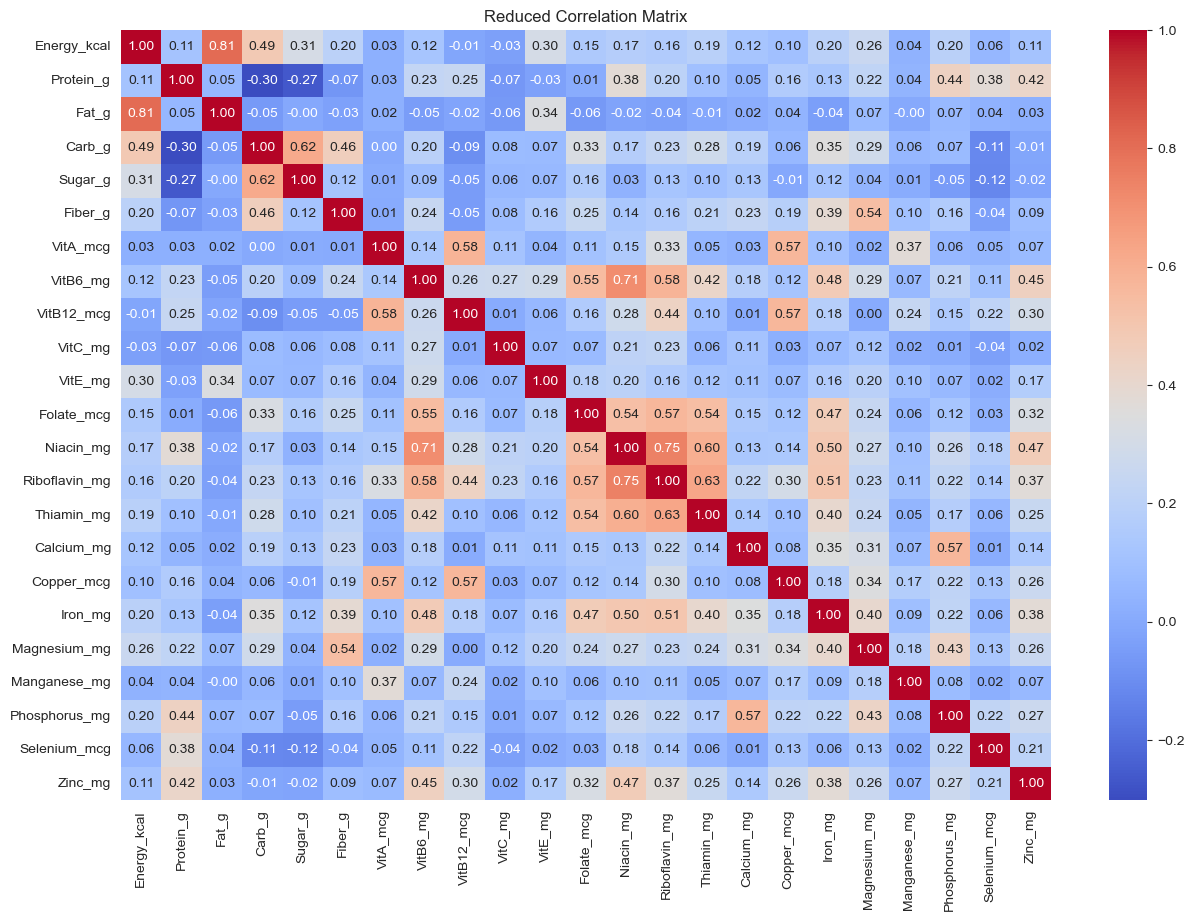

In [27]:
redundant_features = set()
threshold = 0.9
for i in range(corr_matrix.shape[0]):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            redundant_features.add(corr_matrix.columns[i])

print("Redundant features identified (correlation > 0.9):", redundant_features)

reduced_df = numeric_df.drop(columns=redundant_features)
print("Shape of the reduced dataframe:", reduced_df.shape)

reduced_corr_matrix = reduced_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(reduced_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Reduced Correlation Matrix')
plt.show()

Explore the dataset by plotting the distribution of each feature separately.

<Figure size 2000x1500 with 0 Axes>

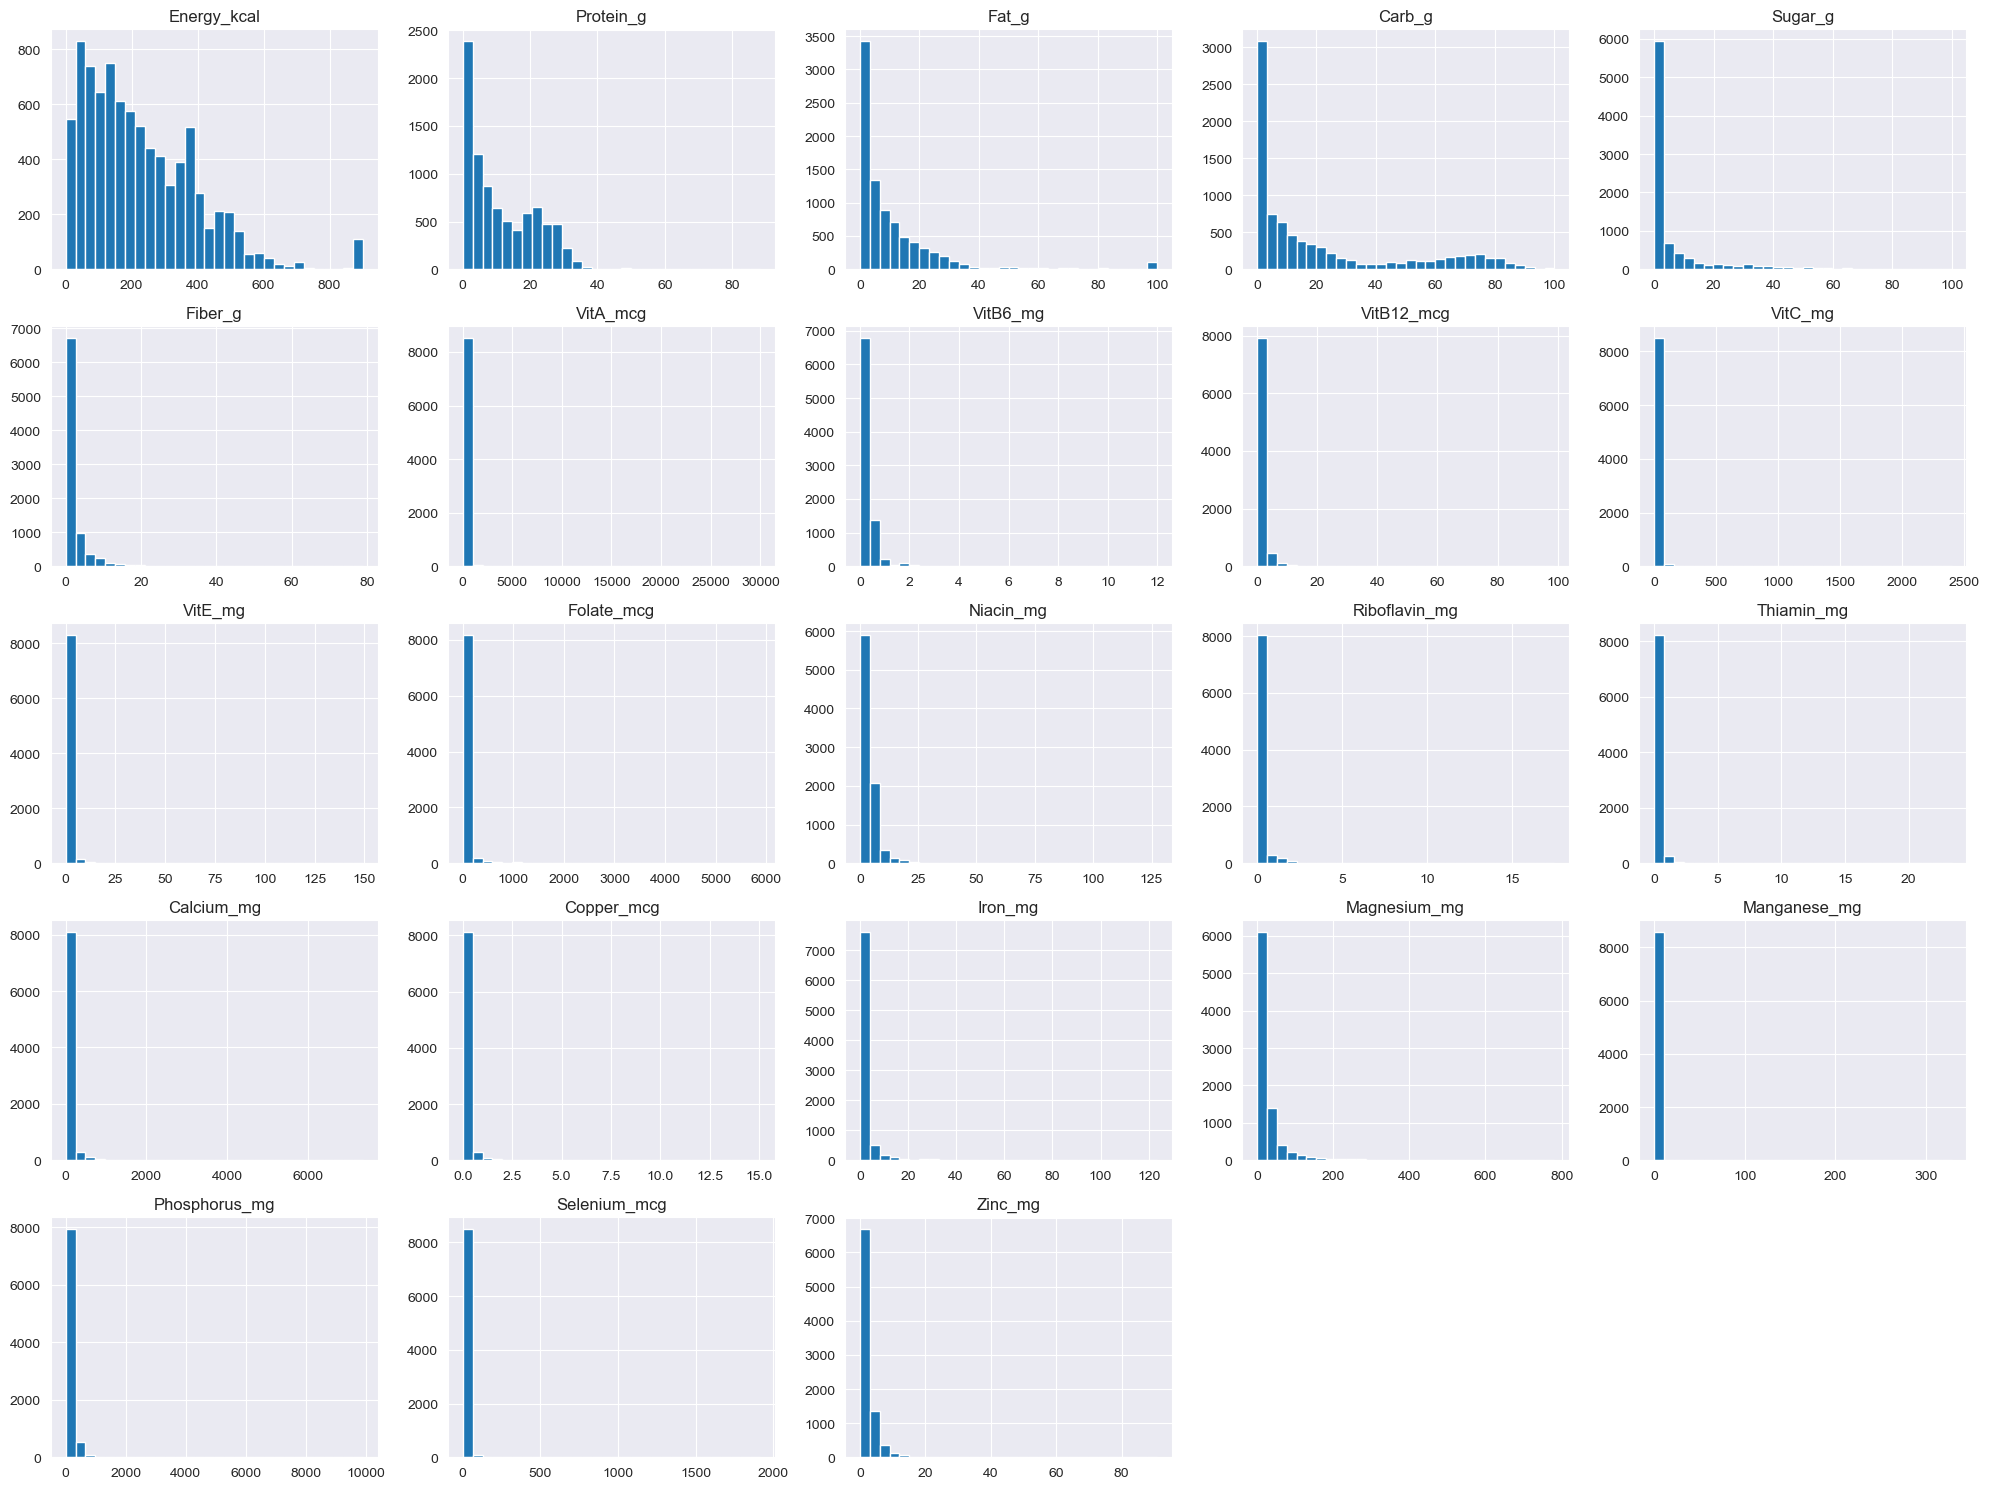

In [30]:
plt.figure(figsize=(20, 15))
reduced_df.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

We can use the Box-Cox transformation to make the data more normally distributed. You can look it up for more information

In [32]:
from scipy.stats import boxcox
# Assuming df is our pandas DataFrame containing numerical features
# df_boxcoxed will be a numpy array
reduced_df = reduced_df + 1
df_boxcoxed = pd.DataFrame(index=reduced_df.index)

for i in reduced_df.columns:
    df_boxcoxed[f"{i}_boxcoxed"] = boxcox(reduced_df[i])[0]

df_boxcoxed.head()

,Energy_kcal_boxcoxed,Protein_g_boxcoxed,Fat_g_boxcoxed,Carb_g_boxcoxed,Sugar_g_boxcoxed,Fiber_g_boxcoxed,VitA_mcg_boxcoxed,VitB6_mg_boxcoxed,VitB12_mcg_boxcoxed,VitC_mg_boxcoxed,...,Riboflavin_mg_boxcoxed,Thiamin_mg_boxcoxed,Calcium_mg_boxcoxed,Copper_mcg_boxcoxed,Iron_mg_boxcoxed,Magnesium_mg_boxcoxed,Manganese_mg_boxcoxed,Phosphorus_mg_boxcoxed,Selenium_mcg_boxcoxed,Zinc_mg_boxcoxed
0,28.218575,0.659887,3.902525,0.058330,0.057269,0.0,2.688244,0.002981,0.140152,0.0,...,0.031506,0.004927,3.186843,0.000000,0.019689,1.187185,0.000000,5.897453,0.674112,0.083954
1,28.218575,0.659887,3.902525,0.058330,0.057269,0.0,2.688244,0.002981,0.111836,0.0,...,0.031506,0.004927,3.186843,0.015185,0.142210,1.187185,0.003960,5.774520,0.674112,0.048072
2,30.599783,0.253858,4.059063,0.000000,0.000000,0.0,2.711487,0.000998,0.009878,0.0,...,0.004943,0.000997,1.601403,0.000997,0.000000,0.000000,0.000000,1.777189,0.000000,0.009920
3,21.085442,4.504849,3.087499,1.232397,0.360184,0.0,2.509633,0.120684,0.468905,0.0,...,0.191363,0.026682,6.150173,0.035193,0.249940,3.998436,0.008798,19.739040,2.458809,0.896741
4,21.527016,4.665388,3.113172,1.364671,0.365391,0.0,2.573502,0.056903,0.474341,0.0,...,0.183964,0.013442,6.384389,0.022202,0.323005,4.062188,0.011644,20.962340,2.458809,0.889206


Now plot the feature distributions again and compare it with the previous plots. (No need to write down anything)

<Figure size 2000x1500 with 0 Axes>

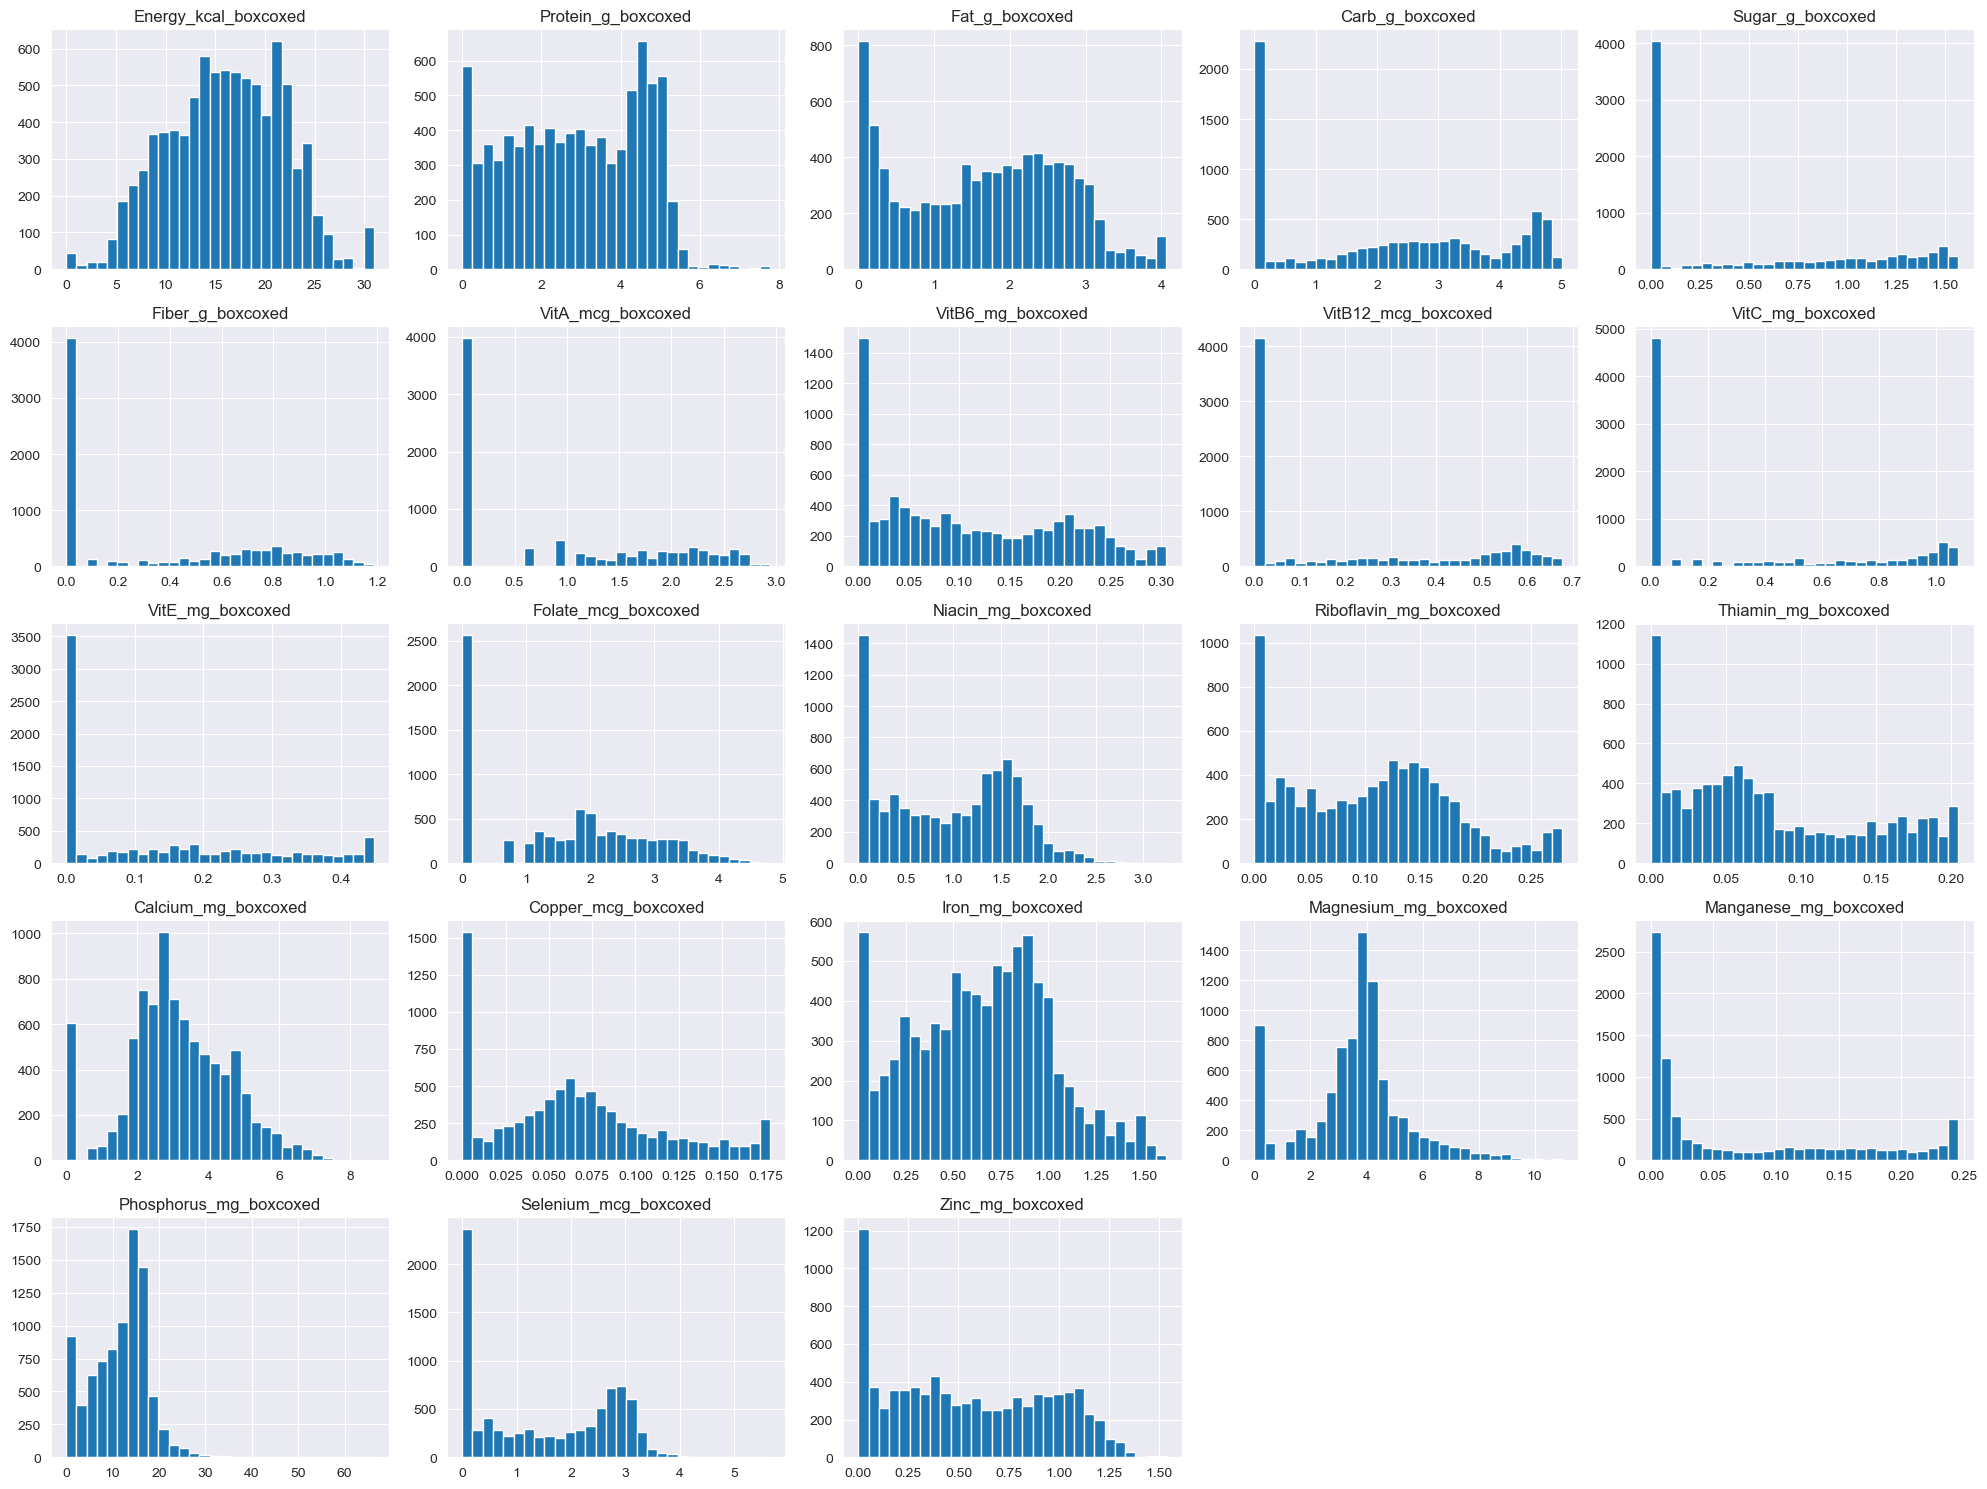

In [35]:
plt.figure(figsize=(20, 15))
df_boxcoxed.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

Finally, Standardize the data to mean 0 and variance 1. You can use standard scaler.

In [39]:
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_boxcoxed), index=df_boxcoxed.index, columns=df_boxcoxed.columns)

total_mean = df_standardized.values.mean()
total_std = df_standardized.values.std()

print("total mean: ", round(total_mean, 1))
print("total standard dev: ", round(total_std, 1))

total mean:  0.0
total standard dev:  1.0


# Model Implementation (40)

Implement PCA from scratch. Remember to calculate and save components and explained variance ratio for later sections.

In [43]:
class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        covariance_matrix = np.cov(X_centered, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        self.components = eigenvectors[:, :self.n_components]
        total_variance = np.sum(eigenvalues)
        explained_variance = eigenvalues[:self.n_components]
        self.explained_variance_ratio_ = explained_variance / total_variance

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def get_explained_variance_ratio(self):
        return self.explained_variance_ratio_

    def get_components(self):
        return self.components

Fit the model and obtain the PCA results. The number of components should be the same as the number of features.

In [44]:
n_features = df_standardized.shape[1]
pca = CustomPCA(n_components=n_features)
pca.fit(df_standardized)
X_pca = pca.transform(df_standardized)
print("Explained Variance Ratio:", pca.get_explained_variance_ratio())
print("PCA Components:\n", pca.get_components())

Explained Variance Ratio: [0.34554936 0.17971019 0.09201387 0.06176452 0.05520037 0.03764111
 0.02996247 0.02566808 0.02294417 0.0192006  0.01828886 0.01721459
 0.01443828 0.01337614 0.0107629  0.00977106 0.00894584 0.00878398
 0.00760274 0.00668982 0.00589323 0.00545379 0.00312402]
PCA Components:
 [[ 1.65126282e-01  4.18501142e-02  5.08062051e-01  1.58787191e-01
   2.04336035e-01  1.80912574e-03  2.30397837e-01 -1.81383992e-01
  -9.68747280e-02 -1.06435860e-01 -1.45702295e-01  1.41609674e-01
  -1.06699261e-01  8.35121548e-02  1.53289006e-01 -1.20599053e-01
   2.17138387e-01  5.94332885e-02 -6.74566681e-02  7.75871048e-02
   1.15935539e-01 -2.28132091e-01  5.61042220e-01]
 [ 2.86085953e-01 -1.96126974e-01  2.68284165e-02 -9.09436323e-02
   4.61478275e-02  1.49797326e-01 -1.14003878e-01 -2.41629422e-02
   6.86941387e-02  3.00585462e-02  5.56251135e-02  4.82969227e-02
   1.50738596e-01 -3.44909525e-01  7.02210306e-02 -1.83871438e-02
  -2.37896747e-01  1.21523072e-01 -3.70295684e-01  6.8

#### check the eigenvalues to find most important components
Plot the explained variance ratio based on the number of components.


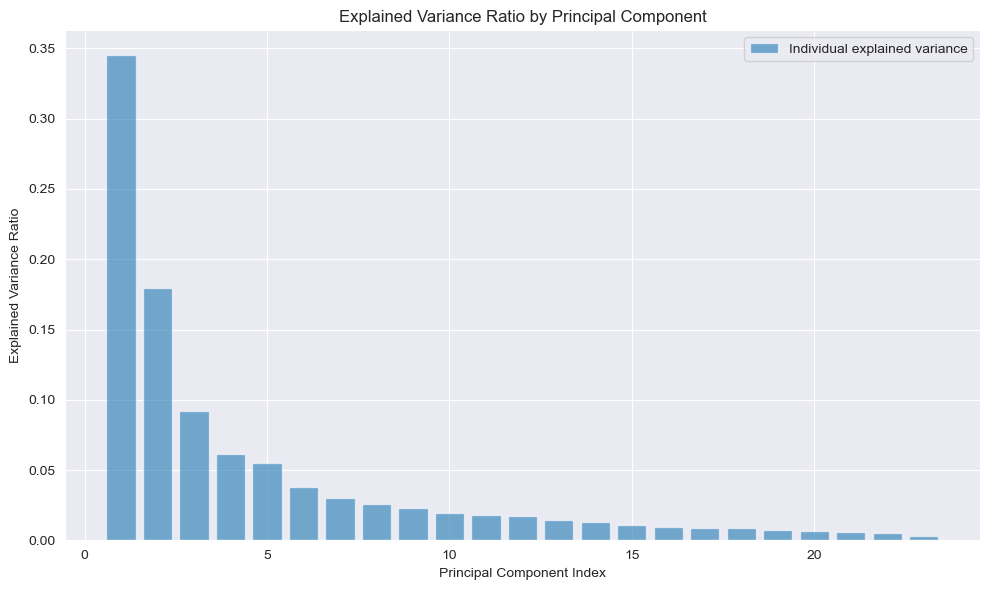

In [47]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_features + 1), pca.get_explained_variance_ratio(), alpha=0.6, label='Individual explained variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

therefore we are going to pick 5 components

In [51]:
n_components = 5
pca = CustomPCA(n_components=n_components)
pca.fit(df_standardized)
explained_variance_ratio_5 = pca.get_explained_variance_ratio()
total_explained_variance_ratio_5 = np.sum(explained_variance_ratio_5)
print(total_explained_variance_ratio_5)

0.734238306514695


Build a new DataFrame with the first 5 components as features and include the FoodGroup column from the first section.

In [63]:
X_pca_df = pd.DataFrame(X_pca, index=df_standardized.index, columns=[f'c{i+1}' for i in range(n_components)])
df_with_additional_columns = pd.concat([df['ID'], X_pca_df, df[['FoodGroup', 'ShortDescrip', 'Descrip']]], axis=1)
df_with_additional_columns.head()

,ID,c1,c2,c3,c4,c5,FoodGroup,ShortDescrip,Descrip
0,1001,-2.638414,-1.702512,1.283725,3.759546,2.413650,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted"
1,1002,-2.537931,-1.550464,1.279816,3.634066,2.492683,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt"
2,1003,-3.751335,-2.080190,2.067932,3.668154,2.457203,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous"
3,1004,2.000578,-1.361858,-0.395834,2.432792,0.887796,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue"
4,1005,1.582713,-1.321484,-0.238444,2.597599,1.286317,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick"


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

In [66]:
correlation_matrix = X_pca_df.corr()
correlation_matrix

,c1,c2,c3,c4,c5
c1,1.000000e+00,4.189028e-17,1.803845e-16,2.208116e-16,-6.543072e-16
c2,4.189028e-17,1.000000e+00,-1.158667e-15,3.101437e-16,-1.116382e-15
c3,1.803845e-16,-1.158667e-15,1.000000e+00,1.459559e-15,4.827038e-16
c4,2.208116e-16,3.101437e-16,1.459559e-15,1.000000e+00,1.671289e-16
c5,-6.543072e-16,-1.116382e-15,4.827038e-16,1.671289e-16,1.000000e+00


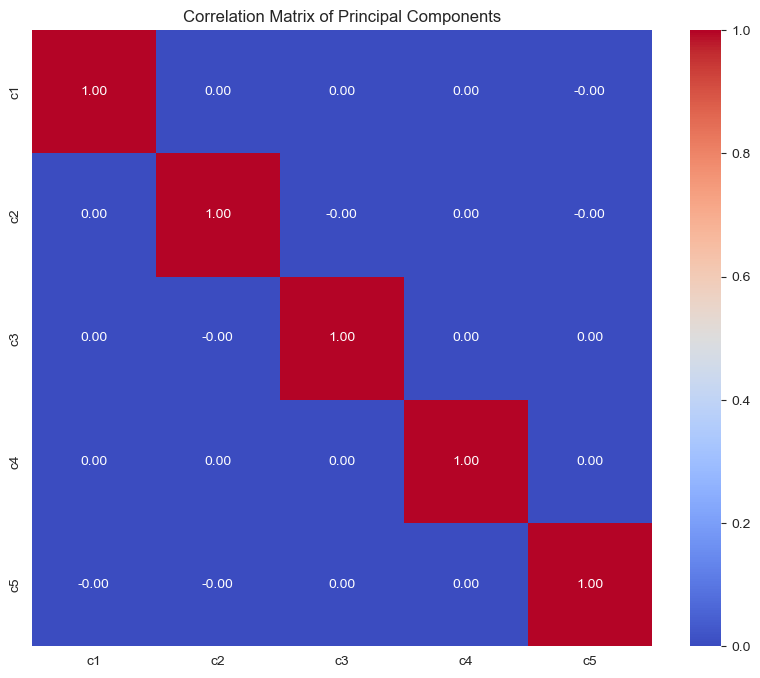

In [67]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Principal Components')
plt.show()

# Result Analysis (30)

### 1- Eigenvectors (10):

In this part, you are required to plot the contribution of nutrients to our new axes or components. Essentially, plot the eigenvectors calculated in our PCA model.

In [79]:
# TODO get eigenvectors
eigenvectors = pca.get_components()
print("Eigenvectors:\n", eigenvectors)

Eigenvectors:
 [[ 0.16512628  0.04185011  0.50806205  0.15878719  0.20433603]
 [ 0.28608595 -0.19612697  0.02682842 -0.09094363  0.04614783]
 [ 0.16148847 -0.12357548  0.40950486  0.28277447  0.2667396 ]
 [-0.03376713  0.41454153  0.25095208 -0.02518522 -0.10139647]
 [-0.07613188  0.29564023  0.20865124  0.27965745 -0.26426232]
 [-0.0046634   0.39783227  0.15364033 -0.11912218 -0.0758999 ]
 [ 0.05699607  0.0957005  -0.29808857  0.53979166 -0.05792838]
 [ 0.2706465  -0.0521657  -0.12185037 -0.01138153 -0.25466299]
 [ 0.22132159 -0.26567098 -0.10747636  0.16706765 -0.19563711]
 [-0.06983022  0.24231394 -0.33448952  0.12928761 -0.24963405]
 [ 0.09080767  0.10430994 -0.01247287  0.53770959  0.25060474]
 [ 0.16785649  0.23839136 -0.26429783  0.01165532  0.10499969]
 [ 0.29409384 -0.06419697  0.0559907  -0.06522343 -0.26442327]
 [ 0.28268656  0.0242405   0.06207401  0.0618551  -0.32254463]
 [ 0.23543974  0.15964121  0.19112445 -0.08653031 -0.28194393]
 [ 0.13551157  0.23105209 -0.12562075  0

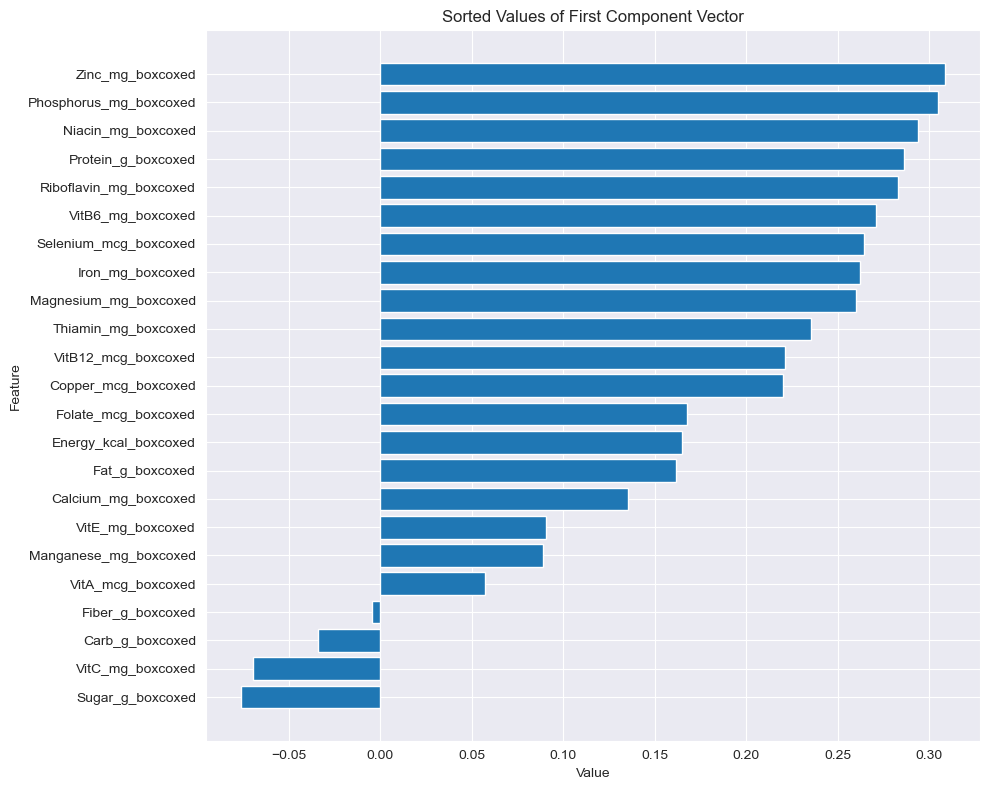

In [81]:
first_component = eigenvectors[:, 0]
sorted_indices = np.argsort(first_component)
sorted_first_component = first_component[sorted_indices]

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_first_component)), sorted_first_component, align='center')
plt.yticks(range(len(sorted_first_component)), df_standardized.columns[sorted_indices])
plt.xlabel('Value')
plt.ylabel('Feature')
plt.title('Sorted Values of First Component Vector')
plt.tight_layout()
plt.show()

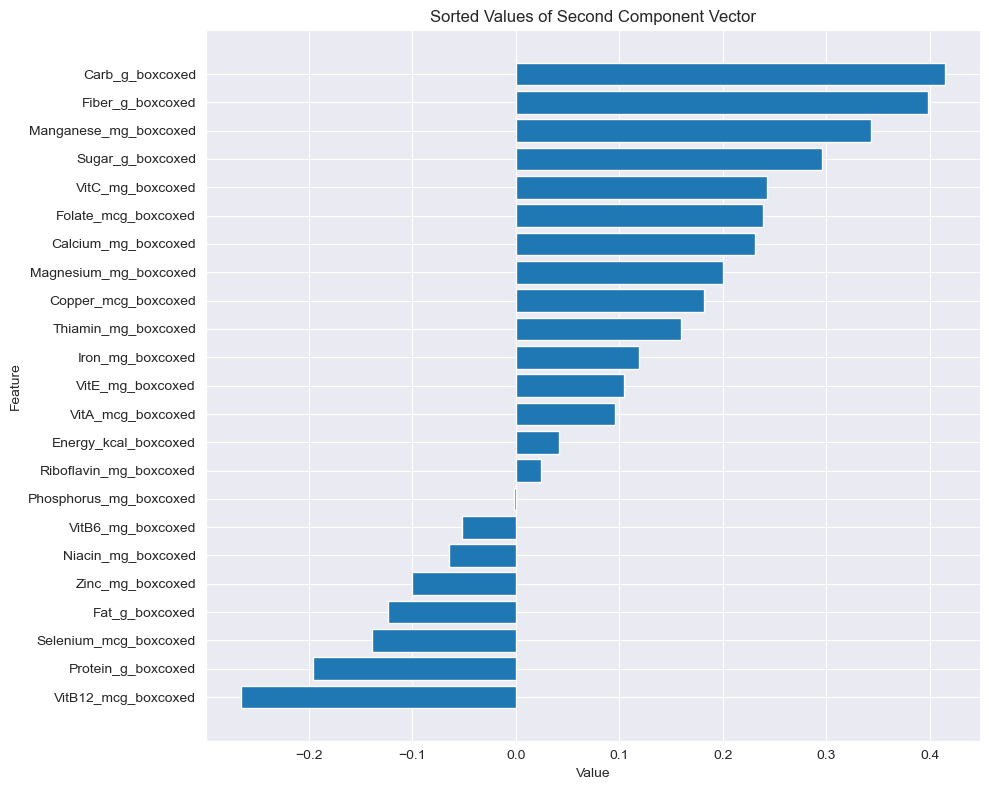

In [83]:
second_component = eigenvectors[:, 1]
sorted_indices = np.argsort(second_component)
sorted_second_component = second_component[sorted_indices]

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_second_component)), sorted_second_component, align='center')
plt.yticks(range(len(sorted_second_component)), df_standardized.columns[sorted_indices])
plt.xlabel('Value')
plt.ylabel('Feature')
plt.title('Sorted Values of Second Component Vector')
plt.tight_layout()
plt.show()

### What do these plots tell us about the first and second components?

In the plot of first PC we see that:

The highest positive contributions to the first principal component are comming from Zinc_mg, Phosphorus_mg, Niacin_mg, Protein_g, and Riboflavin_mg.

While the highest negative contributions are comming from Sugar_g, VitC_mg, Carb_g, and Fiber_g.

This first component seems to capture a contrast between foods high in vitamins and minerals (e.g., Zinc, Phosphorus, Niacin, Protein, Riboflavin) and foods high in sugars and carbohydrates.

Foods with high positive scores on this component are likely to be high in proteins and minerals, while foods with high negative scores might be high in sugars and carbohydrates.

So the outtake we can have from first PC is probably as:

Positive scores: Rich in proteins and minerals.

Negative scores: Rich in sugars and carbohydrates.

In the plot of the second PC we see that:

The highest negative contributions to the second principal component come from VitB12_mcg, Protein_g, Selenium_mg, Fat_g, and Zinc_mg.

The highest positive contributions come from Carb_g, Fiber_g, and Manganese_mg.

The seconnd component seems to differentiate between foods high in certain vitamins and proteins versus foods high in carbohydrates and fiber.

Foods with high negative scores on this component are likely to be rich in proteins, fats, and certain vitamins like Vitamin B12 and Selenium, while foods with high positive scores might be rich in carbohydrates and fiber.

So the outtake we can have from the second PC is probably as:

Positive scores: Rich in carbohydrates and fiber.

Negative scores: Rich in proteins, fats, and specific vitamins.

### 2- Distributions (10)

We're now curious about the relationship between PCAs and the food groups. To better understand this, select the top 500 samples with the highest PCA1 values and plot their food group distribution. Essentially, we're seeking to identify which food groups are more likely to be associated with high PCA1 values. No need for normalization; simply plotting the counts will suffice.

Afterward, plot the distribution of PCA1 for each food group. We're interested in understanding the PCA1 values for each food group.

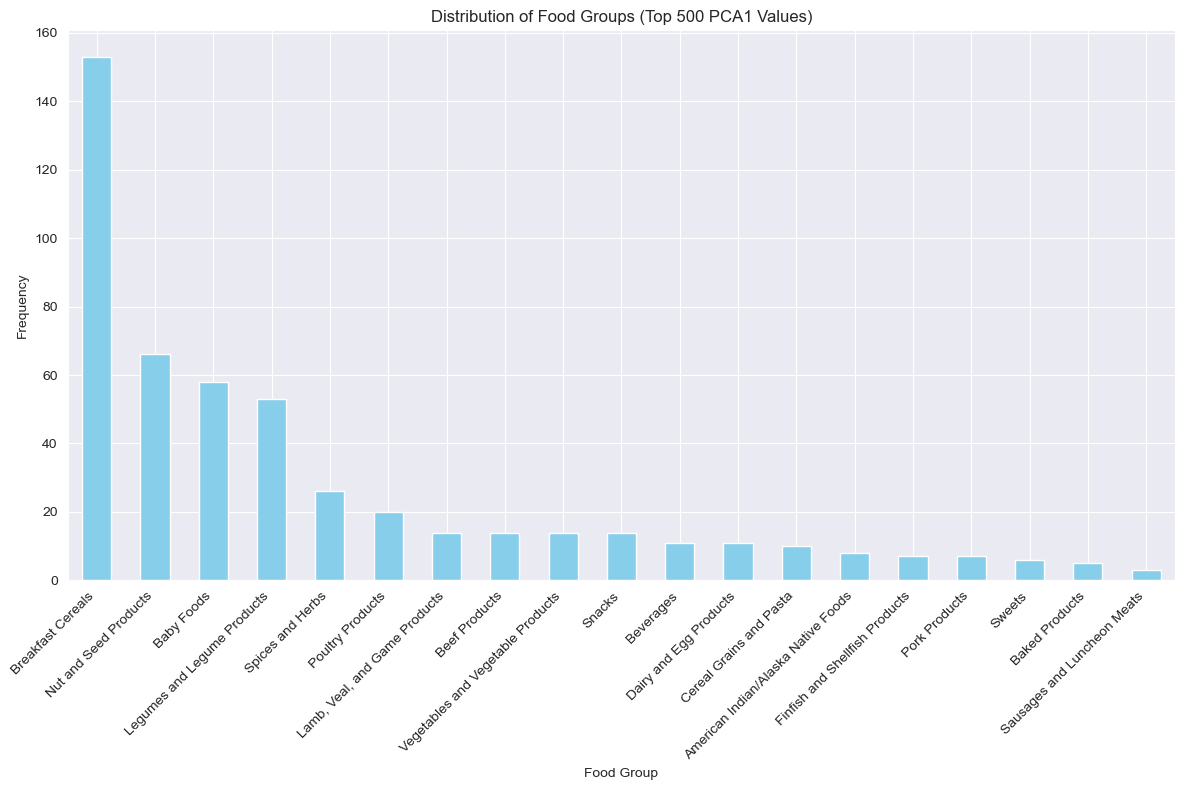

In [87]:
top_500_pca1 = df_with_foodgroup.nlargest(500, 'c1')

plt.figure(figsize=(12, 8))
top_500_pca1['FoodGroup'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Food Group')
plt.ylabel('Frequency')
plt.title('Distribution of Food Groups (Top 500 PCA1 Values)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

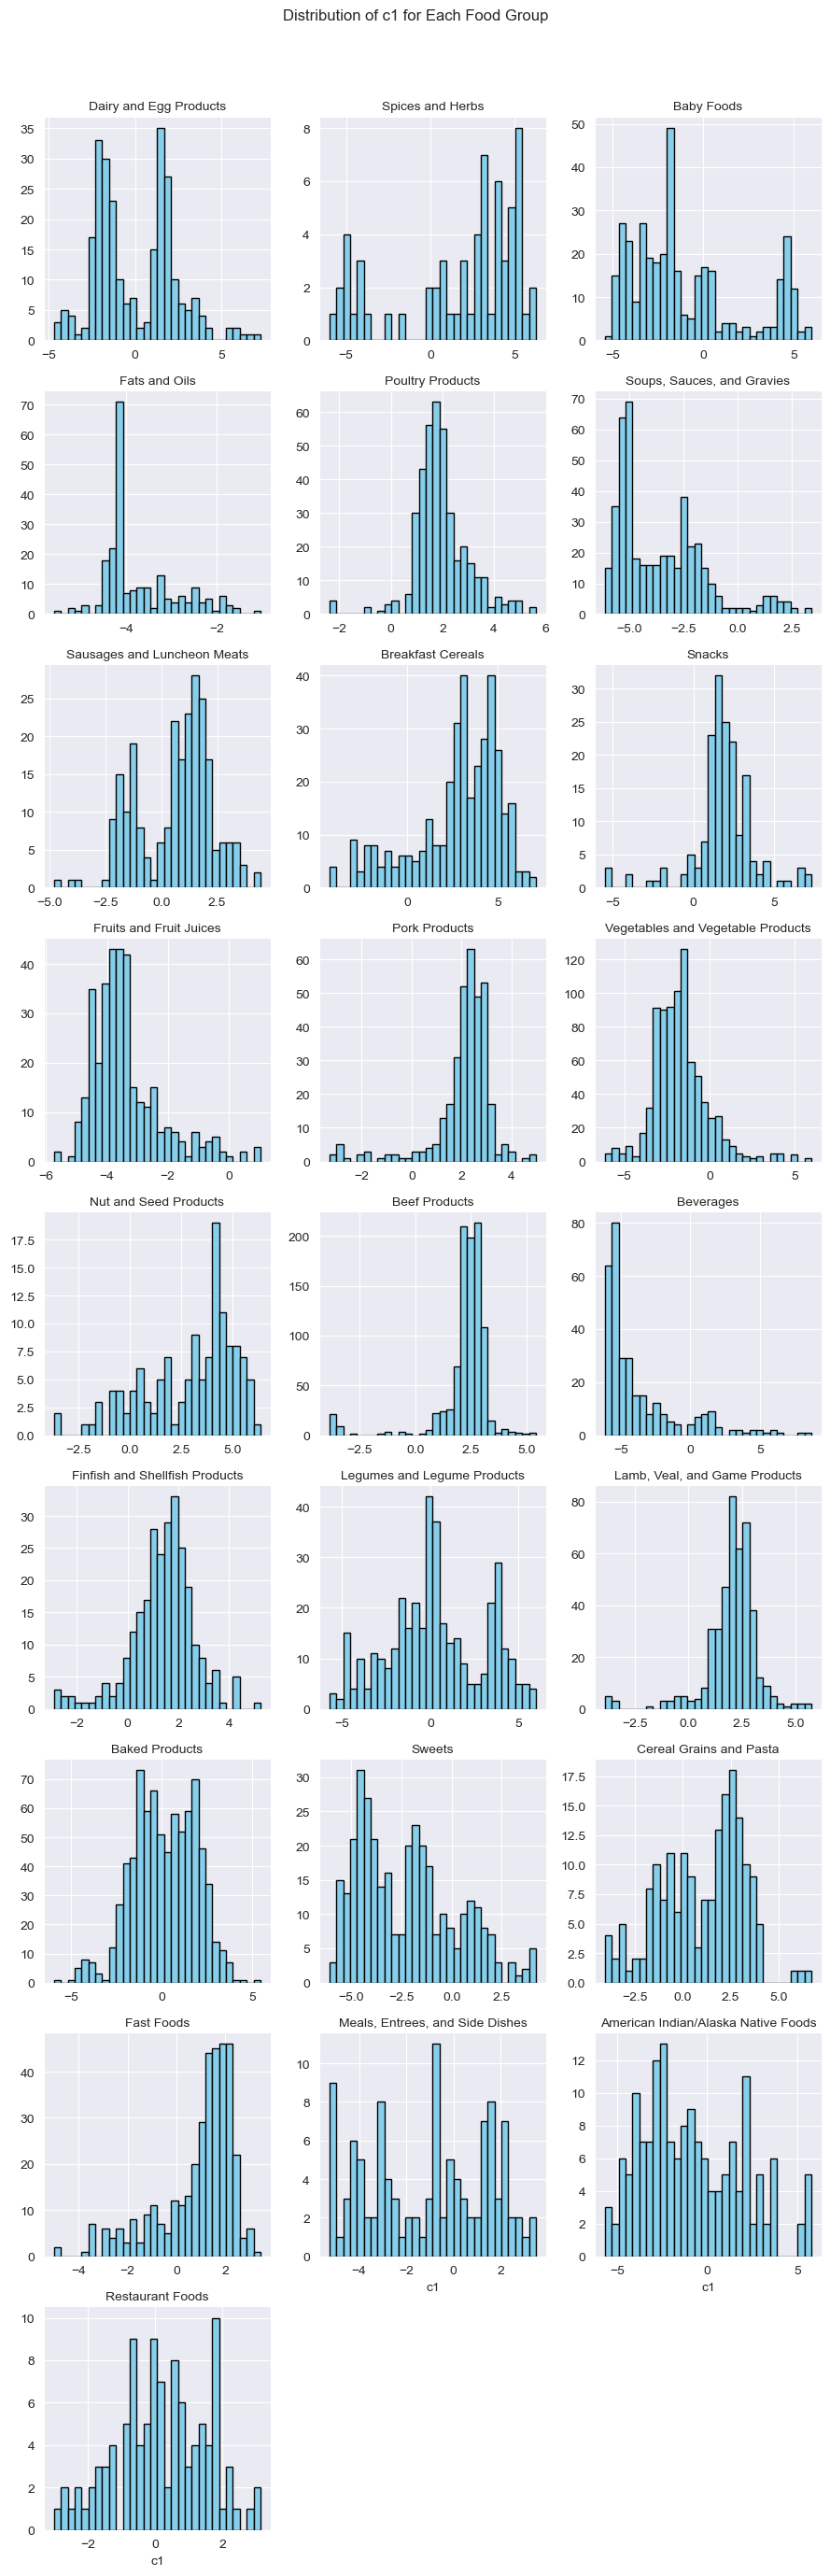

In [99]:
g = sns.FacetGrid(df_with_foodgroup, col='FoodGroup', col_wrap=3, height=3, sharex=False, sharey=False)
g.map(plt.hist, 'c1', bins=30, color='skyblue', edgecolor='black')

g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set_axis_labels('c1', '')
g.fig.suptitle('Distribution of c1 for Each Food Group', y=1.02)
plt.tight_layout()
plt.show()

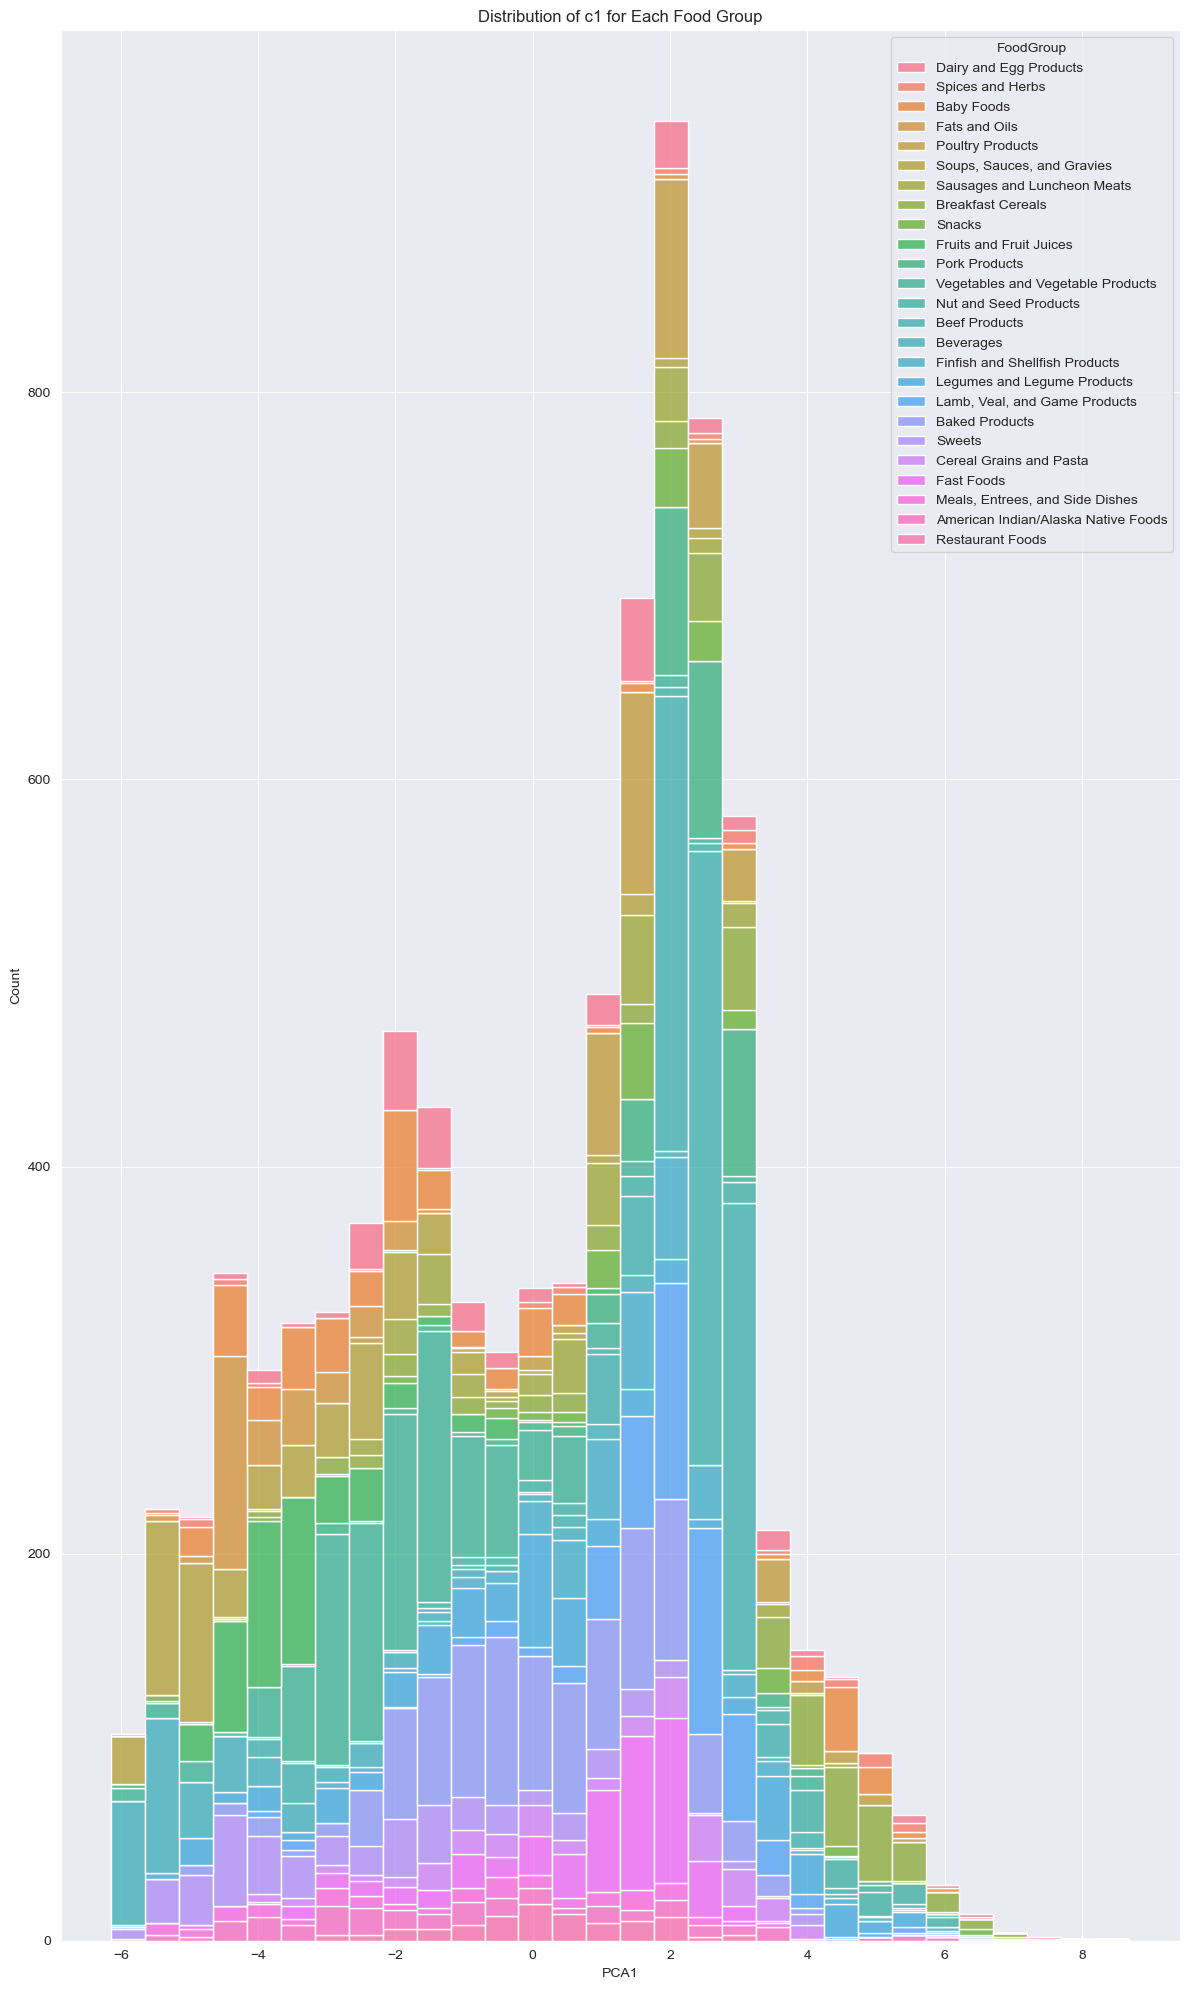

In [98]:
plt.figure(figsize=(12, 20))
sns.histplot(data=df_with_foodgroup, x='c1', hue='FoodGroup', multiple='stack', bins=30)
plt.xlabel('PCA1')
plt.ylabel('Count')
plt.title('Distribution of c1 for Each Food Group')
plt.tight_layout()
plt.show()

Do the same for pca2.

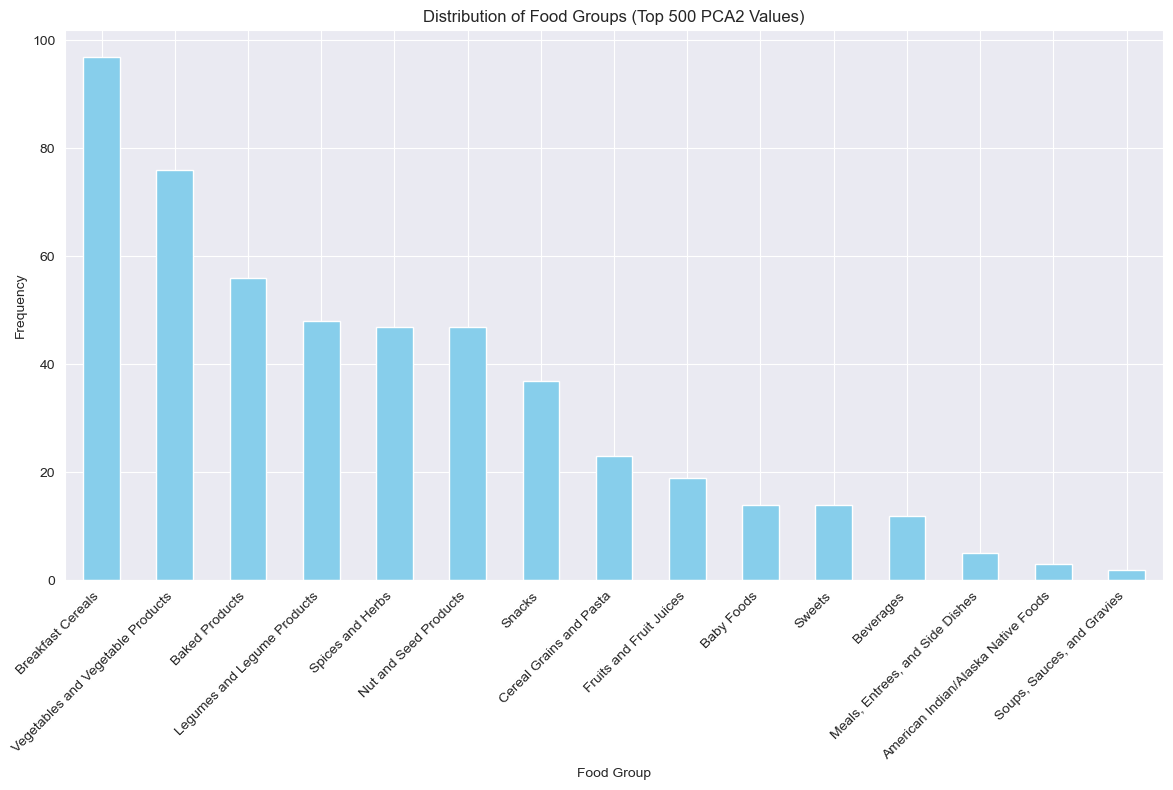

In [93]:
top_500_pca1 = df_with_foodgroup.nlargest(500, 'c2')

plt.figure(figsize=(12, 8))
top_500_pca1['FoodGroup'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Food Group')
plt.ylabel('Frequency')
plt.title('Distribution of Food Groups (Top 500 PCA2 Values)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

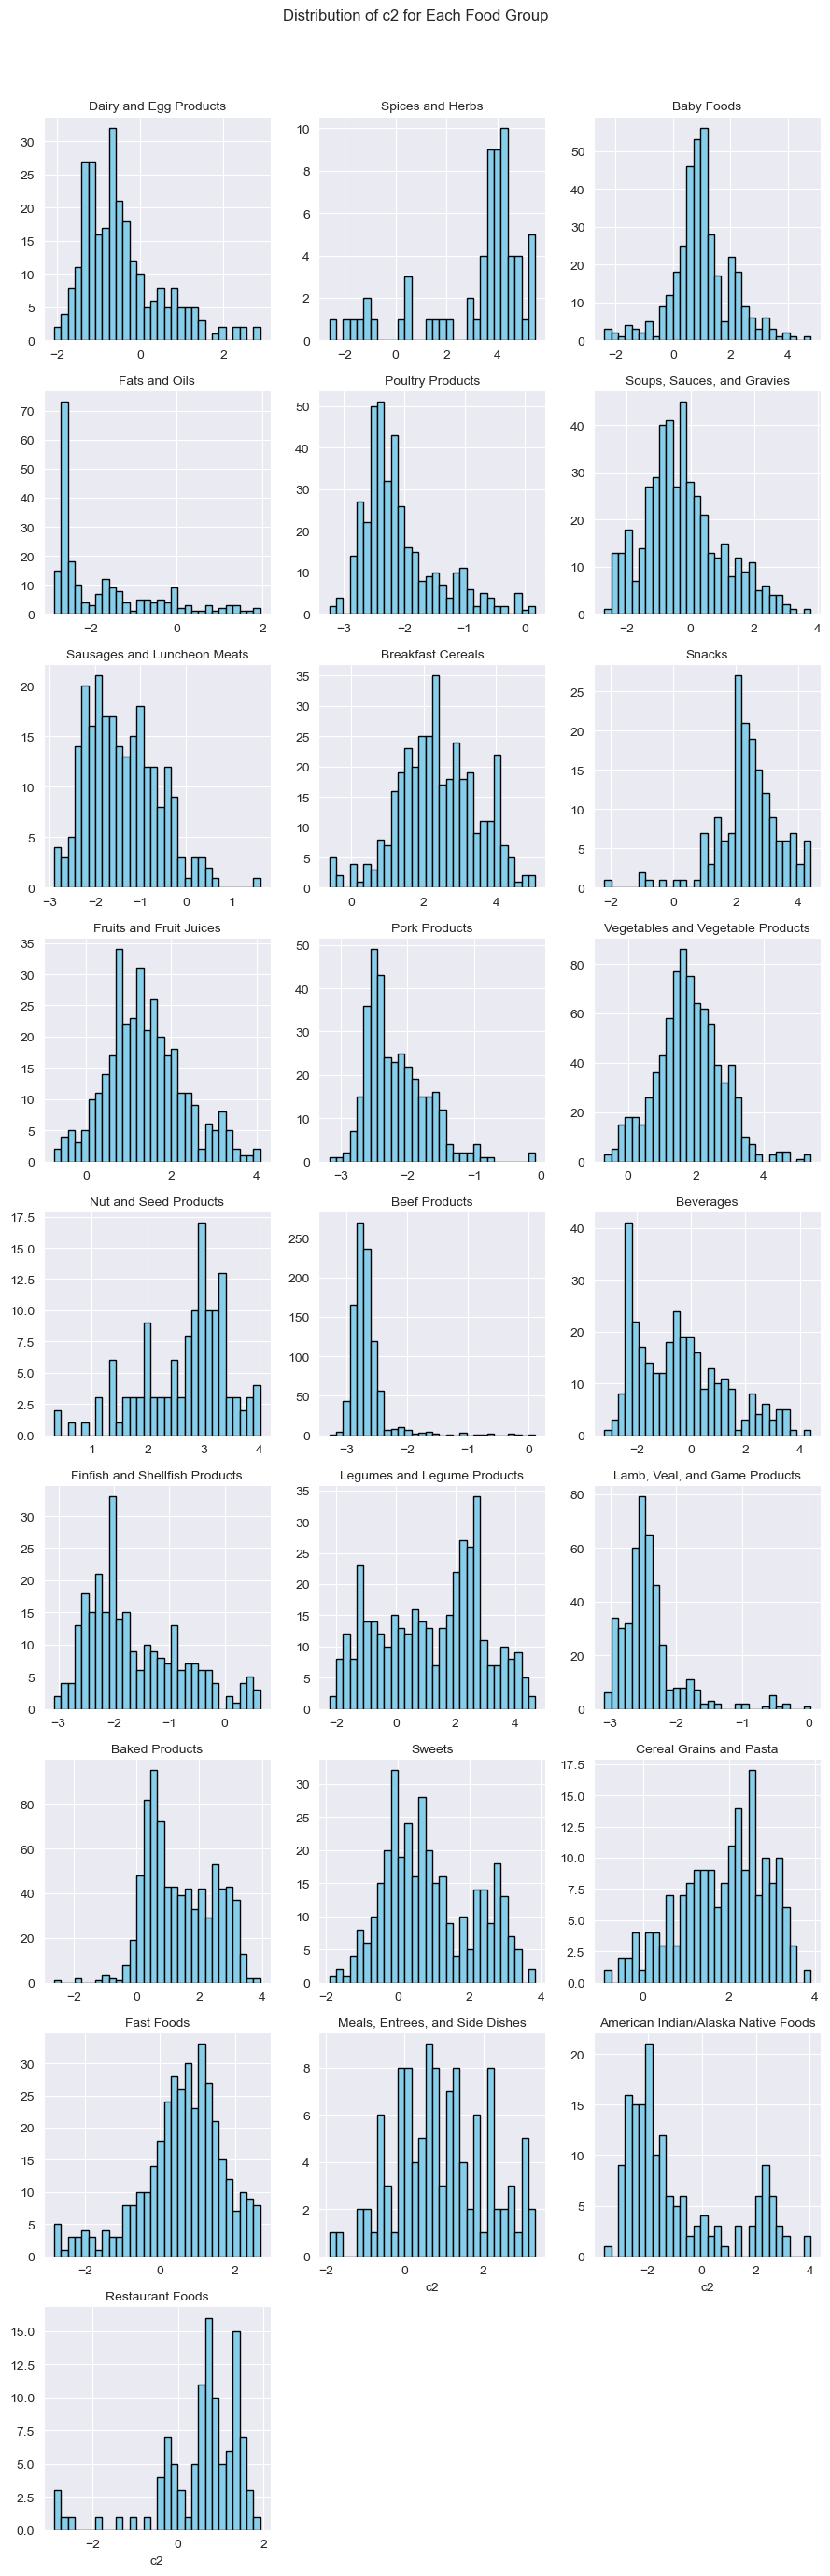

In [96]:
g = sns.FacetGrid(df_with_foodgroup, col='FoodGroup', col_wrap=3, height=3, sharex=False, sharey=False)
g.map(plt.hist, 'c2', bins=30, color='skyblue', edgecolor='black')

g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set_axis_labels('c2', '')
g.fig.suptitle('Distribution of c2 for Each Food Group', y=1.02)
plt.tight_layout()
plt.show()

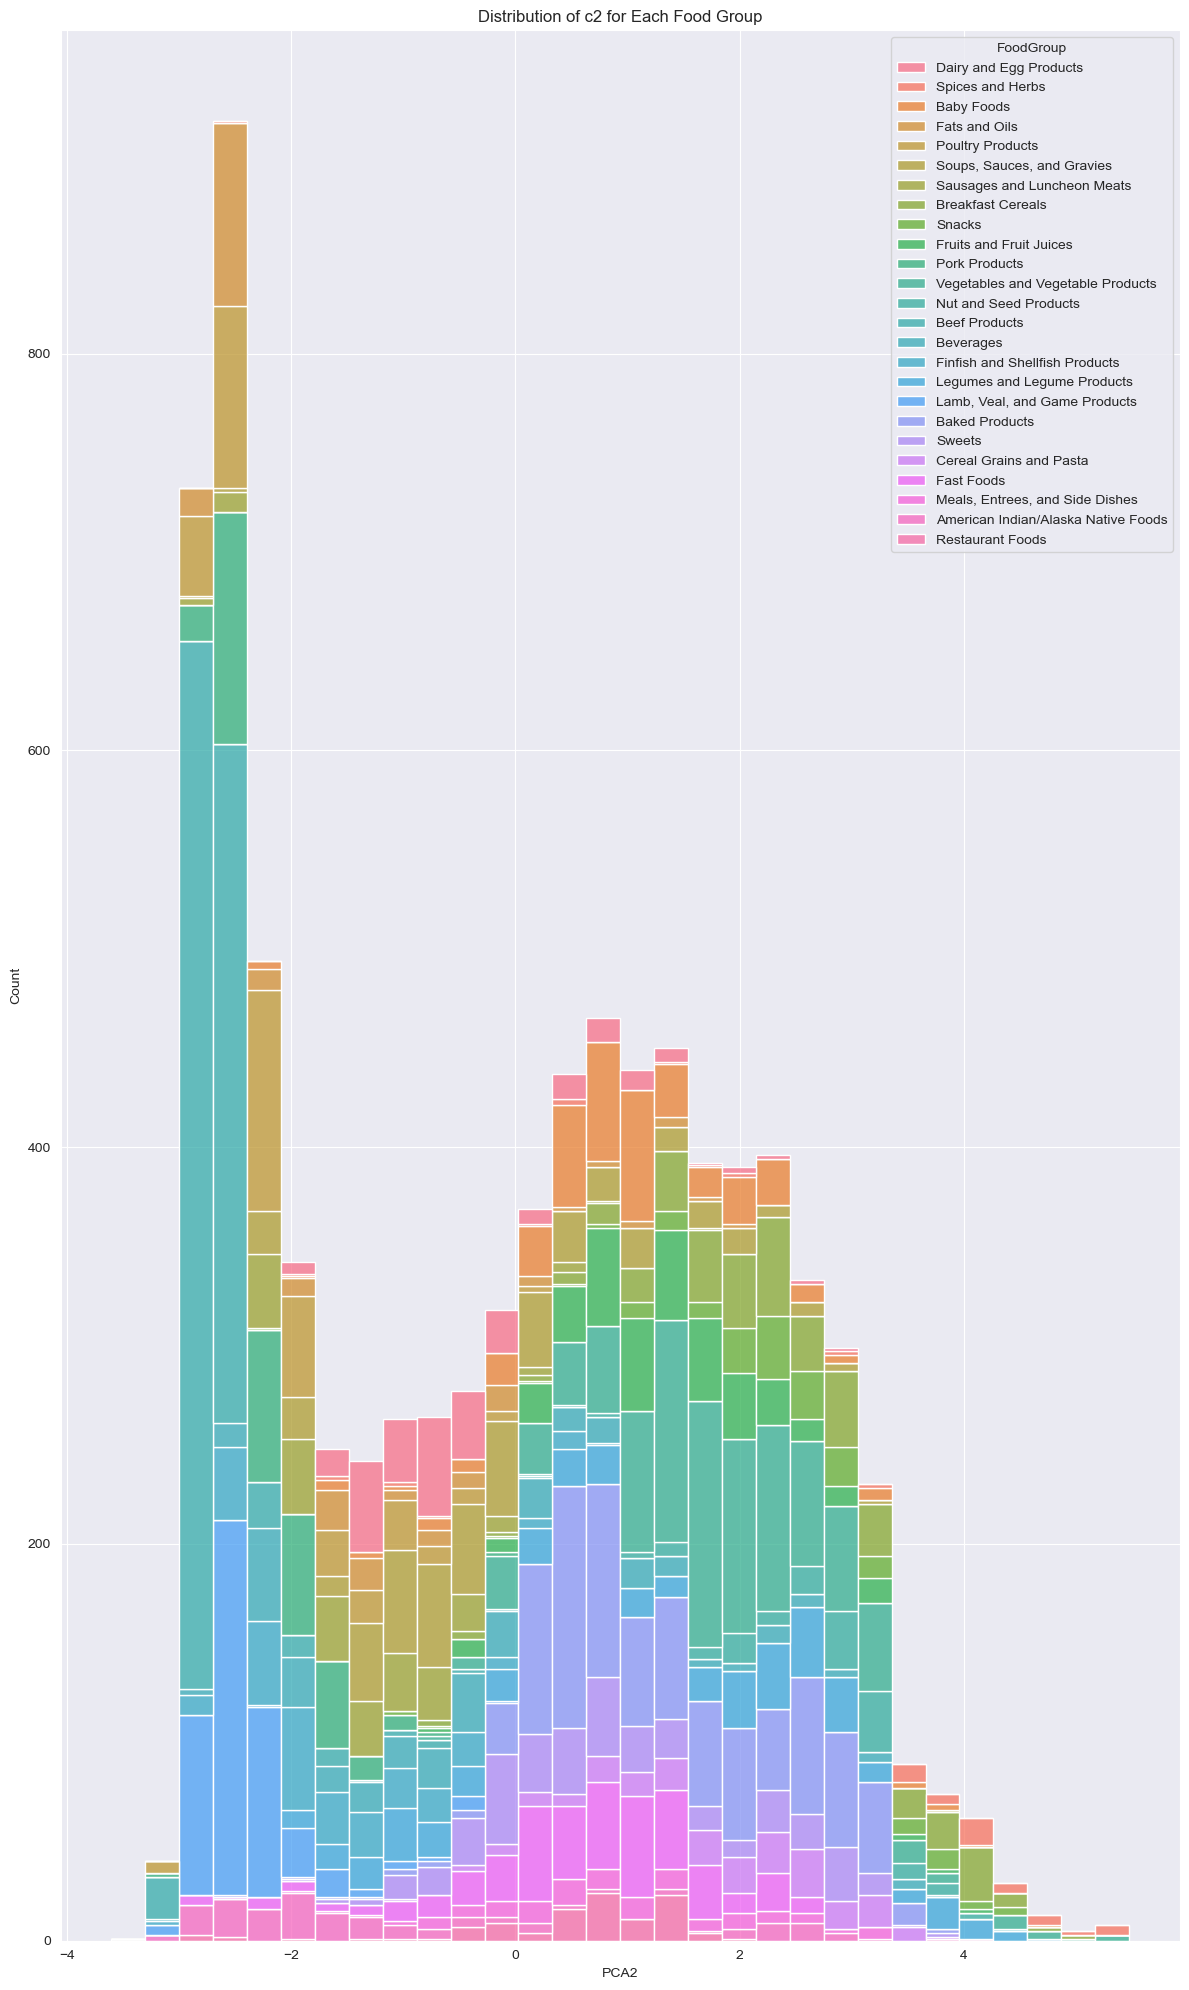

In [97]:
plt.figure(figsize=(12, 20))
sns.histplot(data=df_with_foodgroup, x='c2', hue='FoodGroup', multiple='stack', bins=30)
plt.xlabel('PCA2')
plt.ylabel('Count')
plt.title('Distribution of c2 for Each Food Group')
plt.tight_layout()
plt.show()

### 3- Final result (5)

Lastly, plot the pca1 and pca2 for ```Beverages``` and ```Breakfast Cereals``` in ```FoodGroup```.


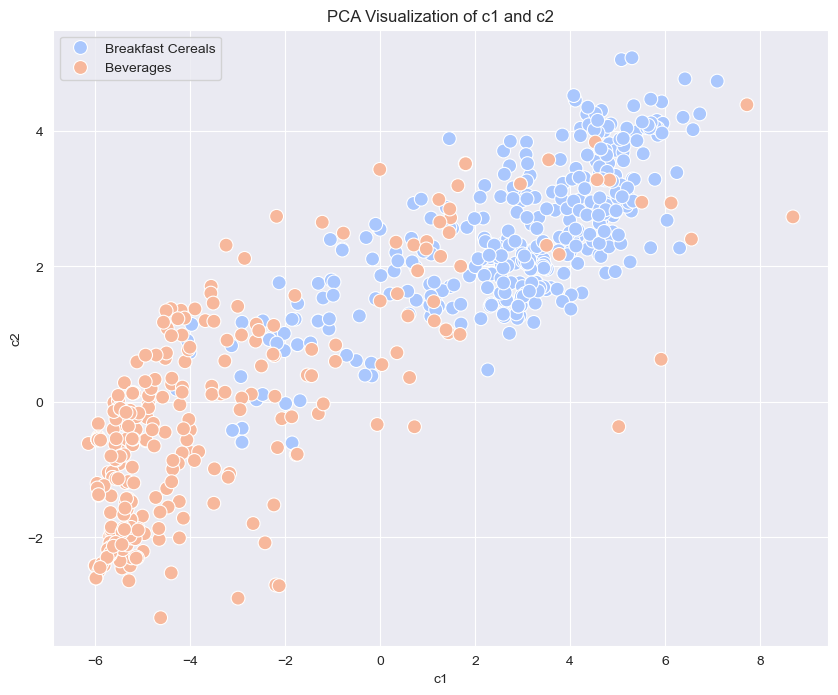

In [100]:
filtered_df = df_with_foodgroup[df_with_foodgroup['FoodGroup'].isin(['Beverages', 'Breakfast Cereals'])]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=filtered_df, x='c1', y='c2', hue='FoodGroup', palette='coolwarm', s=100)
plt.title('PCA Visualization of c1 and c2')
plt.xlabel('c1')
plt.ylabel('c2')
plt.legend()
plt.show()

### What can we learn from the plots in the last subsection (distributions)? (2.5)

From the scatter plot of PCA1 (c1) and PCA2 (c2) for Beverages and Breakfast Cereals, we observe a clear separation between the two food groups along the PCA1 axis. Breakfast Cereals tend to have higher PCA1 values, indicating that they are characterized by the nutrient combinations captured by the first principal component. On the other hand, Beverages tend to cluster around lower PCA1 values. The separation is not absolute, as there is some overlap, but the trend is evident. This indicates that the first principal component is particularly effective in distinguishing between these two food groups. The second principal component (PCA2) adds some additional separation but is less distinct compared to PCA1. Which suggests that they differ significantly in the nutrient profiles captured by PCA1, which may include a combination of factors such as sugars, vitamins, and minerals.

The scatter plot for Beverages and Breakfast Cereals reflects the findings from the PCA1 and PCA2 distribution plots:

PCA1: The distinct separation between Beverages and Breakfast Cereals in the scatter plot corresponds to the PCA1 distribution plots, where Breakfast Cereals cluster at higher PCA1 values and Beverages at lower PCA1 values.

PCA2: The scatter plot shows a less pronounced separation along PCA2, which aligns with the PCA2 distribution plots showing some overlap in values but distinct peaks for different food groups.

The combined analysis of the scatter plot and distribution histograms and bar plots provides a comprehensive understanding of how PCA1 and PCA2 distinguish different food groups based on their nutrient profiles.


### How do the last plot and the distribution of PCA1 in each food group relate to each other? (2.5)

The distribution of PCA1 values for each food group, shown in the previous histogram plots, complements the scatter plot by providing a more detailed view of how individual food groups are spread along the PCA1 axis. For instance, Breakfast Cereals have a broad distribution along PCA1, primarily occupying higher values, which aligns with their position in the scatter plot. Similarly, Beverages are concentrated at lower PCA1 values in both the histogram and the scatter plot. This consistency between the distribution plots and the scatter plot underscores the effectiveness of PCA1 in capturing the primary nutritional differences between these food groups. The scatter plot adds another layer of insight by showing the relative positions of individual samples in the two-dimensional PCA space, highlighting the broader nutritional landscape and the extent of overlap between the food groups.

